Установка библиотек

In [ ]:
!pip3 install anndata
!pip3 install scanpy

In [ ]:
import pandas as pd
from tqdm.notebook import tqdm
import seaborn as sns; sns.set_theme()
import numpy as np
import matplotlib.pyplot as plt
import anndata as ad
import scanpy as sc
from matplotlib.cm import get_cmap
from matplotlib.colors import ListedColormap



---


# Первая часть


---



### Шаг 1 Загружаем файлы
Скачиваем отдельные файлы с каунтами из датасета - https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE103967

Нас интересуют файлы, соответсвующие клеткам "CD45- Epcam+ (4-6 weeks)

In [3]:
# Download CD45- EpCAM+ cells
gsm_list = [
            ('7017', '1395'),
            ('7018', '1396'),
            ('7019', '1398'),
            ('7020', '1458'),
            ('7021', '1459'),
            ('7022', '1539'),
            ('7023', '1540'),
            ('7024', '1541'),
            ('7025', '1542'),
            ('7026', '1544'),
            ('7027', '1545'),
            ('7028', '1546'),
            ('7029', '1646'),
            ('7030', '1647'),
            ('7031', '1648'),
            ('7032', '1649'),
            ('7033', '1751'),
            ('7034', '1753'),
            ('7035', '1792'),
            ('7036', '1793'),
            ('7037', '1795'),
]

for gsm, ab in gsm_list:
    url = f"https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM278{gsm}/suppl/GSM278{gsm}%5FAB{ab}%2Etxt%2Egz"
    !wget -c -nv {url}
    file_name = f"GSM278{gsm}_AB{ab}.txt.gz"
    !gzip -f -d {file_name}

2024-12-10 13:55:57 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787017/suppl/GSM2787017%5FAB1395%2Etxt%2Egz [484276/484276] -> "GSM2787017_AB1395.txt.gz" [1]
2024-12-10 13:55:57 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787018/suppl/GSM2787018%5FAB1396%2Etxt%2Egz [398303/398303] -> "GSM2787018_AB1396.txt.gz" [1]
2024-12-10 13:55:58 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787019/suppl/GSM2787019%5FAB1398%2Etxt%2Egz [490402/490402] -> "GSM2787019_AB1398.txt.gz" [1]
2024-12-10 13:55:58 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787020/suppl/GSM2787020%5FAB1458%2Etxt%2Egz [393417/393417] -> "GSM2787020_AB1458.txt.gz" [1]
2024-12-10 13:55:58 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787021/suppl/GSM2787021%5FAB1459%2Etxt%2Egz [482002/482002] -> "GSM2787021_AB1459.txt.gz" [1]
2024-12-10 13:55:59 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787022/suppl/GSM2787022%5FAB1539%2Etxt%2Egz [34815

### Шаг 2 Объединяем все файлы в один
В итоге получается 1 большая матрица размером 34016 rows × 8064 columns

In [4]:
def read_and_process_file(gsm, ab):
    file_name = f"GSM278{gsm}_AB{ab}.txt"
    #gsm: часть идентификатора GSM.
    #ab: часть идентификатора AB.
    data = pd.read_csv(file_name, sep="\t", index_col=0)
    return data

counts = pd.DataFrame()

for gsm, ab in gsm_list:
    data = read_and_process_file(gsm, ab)
    counts = pd.concat([counts, data], axis=1) \
             if not counts.empty else data

counts.to_csv('combined_scRNA_seq_data.csv')
counts

,W291665,W291666,W291667,W291668,W291669,W291670,W291671,W291672,W291673,W291674,...,W432007,W432008,W432009,W432010,W432011,W432012,W432013,W432014,W432015,W432016
0610005C13Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007C21Rik,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007L01Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
0610007P08Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007P14Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snoZ159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ39,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Шаг 3 Экспрессия маркерных генов

Сопоставляем ID-шники клеток (столцы в файлах из GEO) с ID-шниками от авторов (https://drive.google.com/file/d/1OaqaGULwMUlQ7SkdADOFMW5NrQbGtA3G/view?usp=sharing) -- они должны совпадать. Дальше работаем только с клетками из файла авторов.




Сопоставляем идентификаторы клеток между таблицами counts и cells.

In [5]:
#Извлекает информацию о группах клеток из файла
cells = pd.read_csv(f'thymus_epithel_clusts.txt', sep='\t', index_col = 0)
cells = cells.T
names = {}
groups = []
for key in list(counts.keys()):
    if key not in list(cells.keys()):
        continue

    names[key] = cells[key]['group']
    if names[key] not in groups:
        groups.append(names[key])

groups.sort()
groups

['cTEC', 'mTEC-I', 'mTEC-II', 'mTEC-III', 'mTEC-IV']

In [6]:
n1 = []
for group_name in groups:
    for key in names:
        if names[key] == group_name:
            n1.append(key)

counts = counts[n1]

In [7]:
markers = ['Ctsl', 'Psmb11', 'Prss16', 'Ascl1', 'Sox4', 'Ccl21a', 'Apoe', 'Ly6a', 'Ccl21c', 'Aire', 'Hdc', 'Ubd', \
           'Cd52', 'Ccl20', 'Serpinb6a', 'Ly6d', 'Pigr', 'Car8', 'Lcn2', 'Trpm5', 'Avil', 'Gnb3', 'Lrmp']

Нормализуем данные

Преобразовать значения экспрессии в формате TPM

In [8]:
data_normalized = counts / counts.sum() * 10**6 #вычисляем пропорцию считываний для каждого гена
data_normalized_markers = data_normalized.loc[markers]

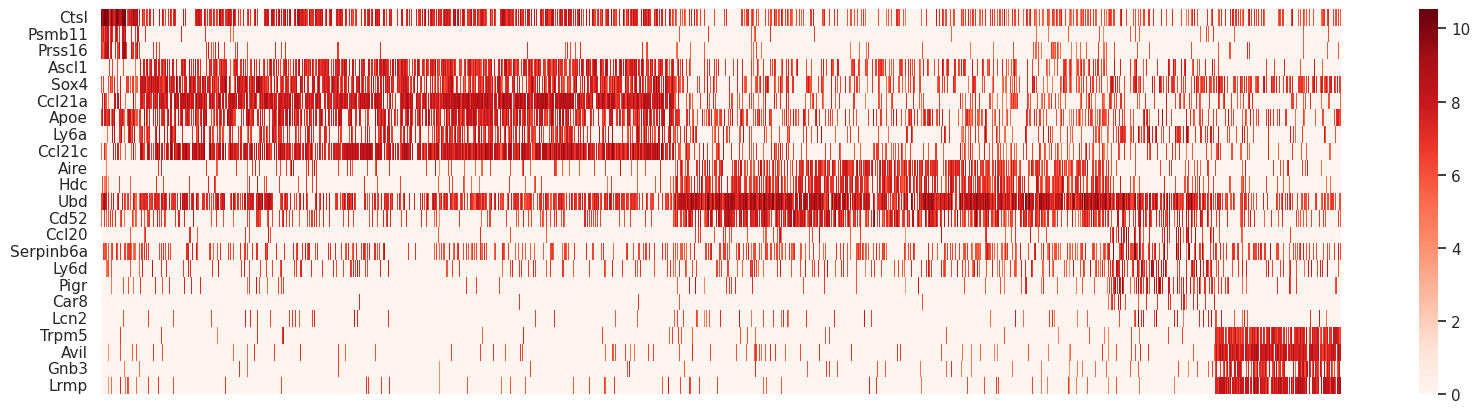

In [9]:
f, ax = plt.subplots(figsize=(20, 5))
ax = sns.heatmap(np.log(data_normalized_markers + 1), yticklabels=True, xticklabels=False, cmap='Reds')
plt.show()

### Шаг 4 Визуализируем все 2341 клетки на UMAP и PCA

Для этого предлагается использовать пакеты anndata (https://anndata-tutorials.readthedocs.io/en/latest/getting-started.html) и scanpy (https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html).

In [10]:
counts_norm = data_normalized

adata = ad.AnnData(counts_norm.T)
sc.pp.log1p(adata)
adata.var_names = list(counts_norm.index)
adata.obs_names = [f"Cell_{i:d}" for i in range(adata.n_obs)]

Добавим метаданные для типов клеток

In [11]:
cells = pd.read_csv(f'thymus_epithel_clusts.txt', sep='\t', index_col = 0)
cells_type_data = list(cells.loc[list(counts), "group"])
cells_type_data[:5]

['cTEC', 'cTEC', 'cTEC', 'cTEC', 'cTEC']

In [12]:
# cells_type_data - cell type provided by authors
adata.obs["cell_type"] = cells_type_data

In [13]:
sc.pp.pca(adata, n_comps=50)

In [14]:
colors = ['red', 'green', 'black', 'pink', 'orange']
cmap = get_cmap(ListedColormap(colors))

<ipython-input-14-06ed9cd57294>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap(ListedColormap(colors))


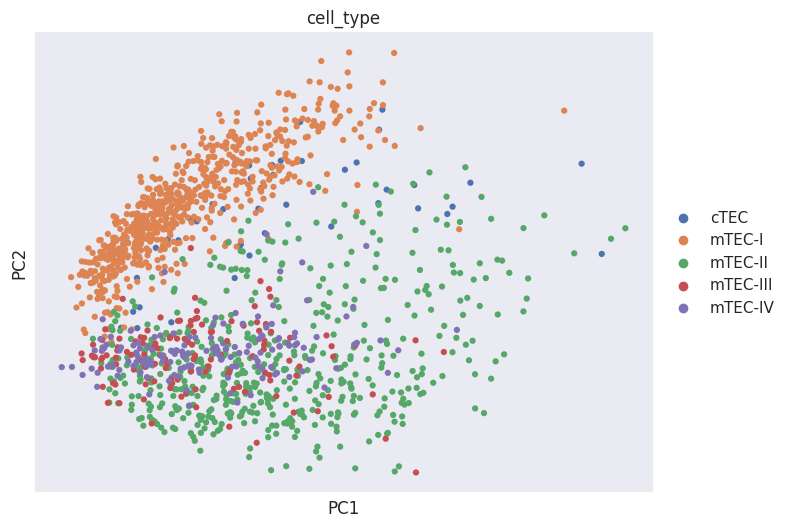

In [15]:
f, ax = plt.subplots(figsize=(8, 6))
sc.pl.pca(adata, color=['cell_type'], colorbar_loc=None, color_map=cmap, ax=ax)

mTEC-I (оранжевый): Образует четко выделенный кластер в верхней части графика. Это указывает на высокую степень гомогенности данного типа клеток по их экспрессионным профилям.

mTEC-II (зеленый): Формирует основной кластер в центре графика. Распределение клеток этого типа более рассеянное, что может свидетельствовать о гетерогенности клеток внутри этой группы.

cTEC (синий): Расположен ближе к краю графика и занимает небольшую область. Это говорит о том, что данный тип клеток обладает уникальными характеристиками, отличающими его от других групп

mTEC-III (красный) и mTEC-IV (фиолетовый): Эти клеточные типы более рассеяны и частично перекрываются с другими группами. Это может указывать на переходные состояния клеток или близость их экспрессионных профилей к соседним типам.

In [16]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

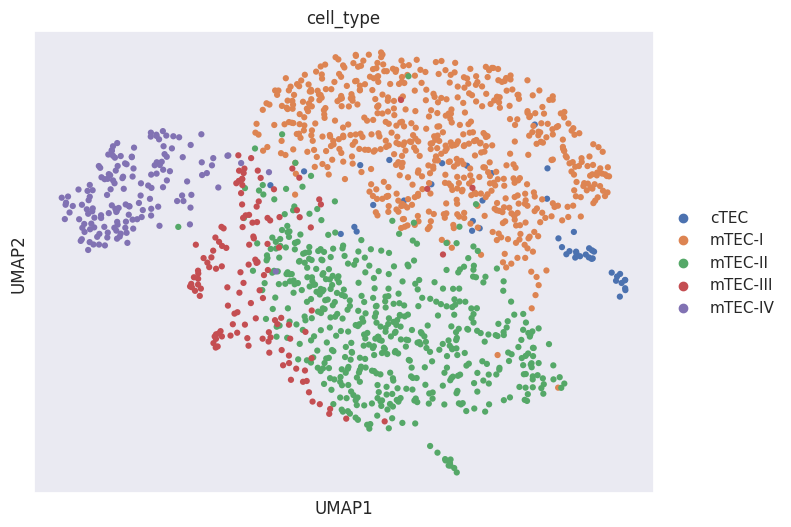

In [17]:
f, ax = plt.subplots(figsize=(8, 6))
sc.pl.umap(adata, color=['cell_type'], colorbar_loc=None, color_map=cmap, ax=ax)
plt.show()

* cTEC (синий):

Клетки этого типа формируют отдельный, четко изолированный кластер в левой части графика.
Это указывает на уникальность экспрессионных профилей данного типа клеток по сравнению с другими.

* mTEC-I (оранжевый):

Образуют компактный и плотный кластер, расположенный в верхней части графика.
Четкое отделение от других групп подтверждает гомогенность этой популяции клеток.

* mTEC-II (зеленый):

Крупный кластер в центре графика. Его разреженность и перекрытие с другими группами указывает на гетерогенность внутри этого типа клеток.
Возможна биологическая связь с другими типами (например, переходные состояния).

*mTEC-III (красный):

Клетки этого типа образуют небольшой, менее плотный кластер, который частично перекрывается с mTEC-II.
Это может указывать на переходные состояния между mTEC-II и mTEC-III.
mTEC-IV (фиолетовый):

Образуют отдельный, но довольно разреженный кластер, что может указывать на редкость этих клеток или на их высокоспецифичный профиль экспрессии.

# Вторая часть

### Шаг 1 Загружаем файлы

In [18]:
!gdown 1jDnstauvQvZsm_89saoUKTVykSicZPc2
SRR2038194 = pd.read_csv("SRR2038194.gene_name.counts", sep='\t', names=["Gene", "Counts"], index_col=0)

!gdown 1jMW6oEUJLk2snJOnxgRGBwVOjcmYrThe
SRR2038195 = pd.read_csv("SRR2038195.gene_name.counts", sep='\t', names=["Gene", "Counts"], index_col=0)

Downloading...
From: https://drive.google.com/uc?id=1jDnstauvQvZsm_89saoUKTVykSicZPc2
To: /content/SRR2038194.gene_name.counts
100% 585k/585k [00:00<00:00, 25.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1jMW6oEUJLk2snJOnxgRGBwVOjcmYrThe
To: /content/SRR2038195.gene_name.counts
100% 590k/590k [00:00<00:00, 94.7MB/s]


### Шаг 2 Нормализуем данные

In [19]:
normalized_SRR2038194 = SRR2038194 / SRR2038194.sum() * 10**6
normalized_SRR2038195 = SRR2038195 / SRR2038195.sum() * 10**6

И сразу объединим нормализованные данные

In [20]:
normalized = pd.concat(
    [normalized_SRR2038194, normalized_SRR2038195],
    axis=1
)

normalized.head()

,Counts,Counts
Gene,,
Gnai3,169.326529,154.409877
Pbsn,0.000000,0.124374
Cdc45,12.630941,12.188617
H19,28.767979,37.933961
Scml2,2.607098,2.642940


### Шаг 3 Возьмем среднее значение

In [21]:
normalized = normalized.mean(axis=1)
normalized.head()

,0
Gene,
Gnai3,161.868203
Pbsn,0.062187
Cdc45,12.409779
H19,33.350970
Scml2,2.625019


Возьмём клетки группы `mTEC-IV`

In [22]:
n2 = []
for key in names:
    if names[key] == 'mTEC-IV':
        n2.append(key)

In [23]:
normalized_data = counts / counts.sum() * 10**6
norm_data_mTEC4 = normalized_data[n2]
norm_data_mTEC4.head()

,W291694,W291696,W291702,W291709,W291712,W291746,W291795,W291804,W291830,W291866,...,W431867,W431883,W431884,W431894,W431897,W431960,W431982,W431996,W432001,W432005
0610005C13Rik,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0610007C21Rik,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,675.219446,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0610007L01Rik,0.0,0.0,0.0,0.0,0.0,455.373406,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0610007P08Rik,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0610007P14Rik,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
norm_data_mTEC4 = norm_data_mTEC4.mean(axis = 1)
norm_data_mTEC4.head()

,0
0610005C13Rik,0.000000
0610007C21Rik,30.192320
0610007L01Rik,51.624569
0610007P08Rik,8.036581
0610007P14Rik,46.598275


### Шаг 4 Подготовим подвыборку генов для анализа

В качестве подвыборки были взяты маркеры из первой части. Но необходимо проверить, все ли они находятся в исследуемом файле.

In [25]:
for marker in markers:
    if marker not in normalized.index:
        print(f"Маркер {marker} не найден в counts файле")
        markers.remove(marker)

Маркер Ccl21c не найден в counts файле


In [26]:
genes_in_common = list(set(normalized.index) & set(norm_data_mTEC4.index))

In [27]:
data = pd.concat(
    [pd.Series(
        normalized.loc[genes_in_common],
        name="bulk"
    ).to_frame(),

     pd.Series(
         norm_data_mTEC4.loc[genes_in_common],
         name="mTEC-IV"
    ).to_frame()],
    axis = 1
)

data

,bulk,mTEC-IV
Spag11a,0.000000,2.592586
Fgd6,94.993484,20.988688
Kcna7,4.824871,0.000000
Atp6v0d2,3.324621,0.000000
Nudt9,21.027530,19.700342
...,...,...
Olfr364-ps1,0.000000,0.000000
Rab11fip2,21.180971,35.130938
Apol10a,4.138791,0.000000
Ctnna1,392.261261,248.448876


### Шаг 5 Отобразим среднее значение экспрессии по каждому маркеру

<Axes: title={'center': 'Средняя экспрессия по группам'}, xlabel='bulk', ylabel='mTEC-IV'>

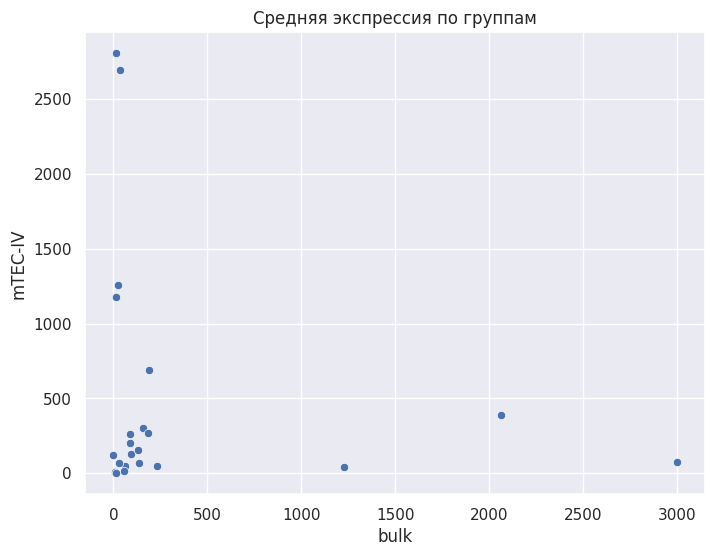

In [28]:
f, ax = plt.subplots(figsize=(8, 6))
ax.set_title("Средняя экспрессия по группам")
scatter_data = data.loc[markers]
sns.scatterplot(data=scatter_data, x="bulk", y="mTEC-IV", ax=ax)

In [29]:
data_n = data.assign(diff = abs(data["bulk"] - data["mTEC-IV"]) / 2)
data_n = data_n.assign(mean = abs(data["bulk"] + data["mTEC-IV"]) / 2)
data_n

,bulk,mTEC-IV,diff,mean
Spag11a,0.000000,2.592586,1.296293,1.296293
Fgd6,94.993484,20.988688,37.002398,57.991086
Kcna7,4.824871,0.000000,2.412436,2.412436
Atp6v0d2,3.324621,0.000000,1.662310,1.662310
Nudt9,21.027530,19.700342,0.663594,20.363936
...,...,...,...,...
Olfr364-ps1,0.000000,0.000000,0.000000,0.000000
Rab11fip2,21.180971,35.130938,6.974983,28.155955
Apol10a,4.138791,0.000000,2.069395,2.069395
Ctnna1,392.261261,248.448876,71.906192,320.355068


<Axes: title={'center': 'Разница и среднее значение экспрессии'}, xlabel='mean', ylabel='diff'>

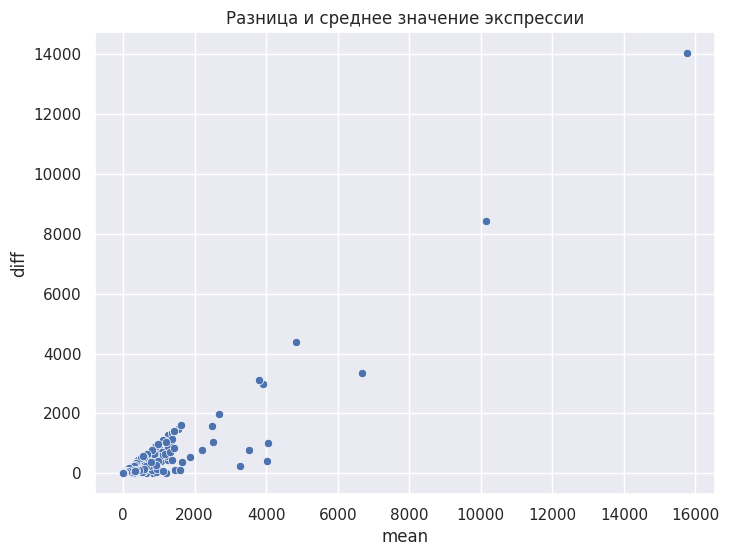

In [30]:
f, ax = plt.subplots(figsize=(8, 6))
ax.set_title("Разница и среднее значение экспрессии")
scatter_data = data_n
sns.scatterplot(data=scatter_data, x="mean", y="diff", ax=ax)

На представленном графике показано сравнение средней экспрессии генов из группы маркеров между двумя условиями: bulk (средняя экспрессия по всем клеткам) и mTEC-IV (средняя экспрессия по клеткам типа mTEC-IV).

Выберем из таблицы гены с небольшой экспрессией и разделим на две группы по отклонению в экспрессии.

In [31]:
data_new = data.assign(group = abs(data["bulk"] - data["mTEC-IV"]) / 2 < 1)
data_new = data_new[(data_new["bulk"] < 100) & (data_new["mTEC-IV"] < 100)]
data_new

,bulk,mTEC-IV,group
Spag11a,0.000000,2.592586,False
Fgd6,94.993484,20.988688,False
Kcna7,4.824871,0.000000,False
Atp6v0d2,3.324621,0.000000,False
Nudt9,21.027530,19.700342,True
...,...,...,...
Dusp18,23.181413,8.472398,False
Olfr364-ps1,0.000000,0.000000,True
Rab11fip2,21.180971,35.130938,False
Apol10a,4.138791,0.000000,False


<Axes: title={'center': 'Две группы по отклонению от среднего'}, xlabel='bulk', ylabel='mTEC-IV'>

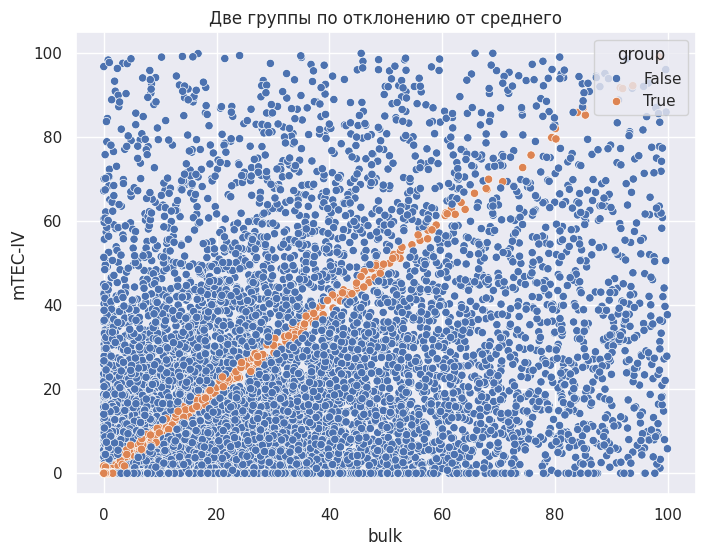

In [32]:
f, ax = plt.subplots(figsize=(8, 6))
ax.set_title("Две группы по отклонению от среднего")
scatter_data = data_new
sns.scatterplot(data=scatter_data, x="bulk", y="mTEC-IV", hue="group", ax=ax)


На представленном графике показаны две группы генов, разделенные по уровню отклонения между экспрессией в двух условиях (bulk и mTEC-IV).

### Шаг 6 Применение PyDESeq2

In [33]:
!pip install pydeseq2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 1.7 MB/s eta 0:00:00


In [34]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

In [35]:
data_normalized_markers

,W291721,W291738,W291836,W291837,W292026,W292286,W292304,W292325,W292330,W292371,...,W431867,W431883,W431884,W431894,W431897,W431960,W431982,W431996,W432001,W432005
Ctsl,20437.038202,8104.738155,12814.194184,25990.735975,16586.409845,24845.633637,19733.215742,17781.851512,15054.435589,609.756098,...,749.625187,0.000000,0.000000,418.410042,595.592615,0.000000,731.528895,0.000000,1626.01626,266.240682
Psmb11,2358.119792,623.441397,2464.268112,386.001029,4815.409310,3675.389591,1322.897145,5316.223648,2396.207741,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
Prss16,1414.871875,623.441397,246.426811,1286.670098,535.045479,6615.701264,2921.397861,5499.541705,6459.342606,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,365.764448,0.000000,0.00000,0.000000
Ascl1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,609.756098,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
Sox4,471.623958,0.000000,739.280434,0.000000,0.000000,0.000000,0.000000,0.000000,416.731781,0.000000,...,0.000000,1778.568253,675.219446,418.410042,0.000000,2753.737215,0.000000,794.912560,0.00000,532.481363
Ccl21a,0.000000,2493.765586,0.000000,4889.346372,0.000000,441.046751,440.965715,0.000000,52.091473,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,266.240682
Apoe,471.623958,7481.296758,0.000000,2058.672156,0.000000,4116.436342,606.327858,916.590284,1354.378288,3048.780488,...,0.000000,444.642063,0.000000,0.000000,1191.185229,1966.955153,1828.822238,397.456280,0.00000,532.481363
Ly6a,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,183.318057,0.000000,0.000000,...,0.000000,0.000000,0.000000,418.410042,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
Ccl21c,157.207986,0.000000,0.000000,1415.337108,0.000000,147.015584,110.241429,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
Aire,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110.241429,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


In [36]:
counts

,W291721,W291738,W291836,W291837,W292026,W292286,W292304,W292325,W292330,W292371,...,W431867,W431883,W431884,W431894,W431897,W431960,W431982,W431996,W432001,W432005
0610005C13Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007C21Rik,2,2,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
0610007L01Rik,0,0,0,0,0,0,3,0,2,0,...,0,0,0,0,0,0,0,0,0,0
0610007P08Rik,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007P14Rik,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snoZ159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ39,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
snoZ40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
import pandas as pd
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
import matplotlib.pyplot as plt
import seaborn as sns


In [38]:
# Предполагаем, что данные находятся в DataFrame `data`
# Нормализация и приведение данных к "псевдо-сырым" форматам
bulk_raw = (data["bulk"] * 1e6 / data["bulk"].sum()).round().astype(int)
mtec_iv_raw = (data["mTEC-IV"] * 1e6 / data["mTEC-IV"].sum()).round().astype(int)

# Создание таблицы считываний
counts = pd.DataFrame({
    "bulk": bulk_raw,
    "mTEC-IV": mtec_iv_raw
})

# Создание псевдорепликатов
counts["bulk_rep1"] = counts["bulk"]
counts["bulk_rep2"] = counts["bulk"]
counts["mTEC-IV_rep1"] = counts["mTEC-IV"]
counts["mTEC-IV_rep2"] = counts["mTEC-IV"]

# Создание метаданных с учетом количества столбцов в counts
metadata = pd.DataFrame({
    "condition": ["bulk", "bulk", "bulk", "mTEC-IV", "mTEC-IV", "mTEC-IV"]
}, index=counts.columns)


# Проверка данных
print(counts.head())
print(metadata)



          bulk  mTEC-IV  bulk_rep1  bulk_rep2  mTEC-IV_rep1  mTEC-IV_rep2
Spag11a      0        3          0          0             3             3
Fgd6       103       27        103        103            27            27
Kcna7        5        0          5          5             0             0
Atp6v0d2     4        0          4          4             0             0
Nudt9       23       25         23         23            25            25
             condition
bulk              bulk
mTEC-IV           bulk
bulk_rep1         bulk
bulk_rep2      mTEC-IV
mTEC-IV_rep1   mTEC-IV
mTEC-IV_rep2   mTEC-IV


In [45]:
# Создание объекта DESeq2
dds = DeseqDataSet(
    counts=counts.T,  # Транспонирование для формата DESeq2
    metadata=metadata,
    design_factors="condition"
)

# Запуск анализа
dds.deseq2()

# Получение статистики
stats = DeseqStats(dds)
results = stats.summary()


# Проверка структуры results
print(results)



Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 25.47 seconds.

Fitting dispersion trend curve...
/usr/local/lib/python3.10/dist-packages/pydeseq2/dds.py:727: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.88 seconds.

Fitting MAP dispersions...
... done in 36.51 seconds.

Fitting LFCs...
... done in 22.84 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 6.43 seconds.



Log2 fold change & Wald test p-value: condition mTEC-IV vs bulk
               baseMean  log2FoldChange     lfcSE      stat    pvalue  \
Spag11a        1.603567        1.023251  2.224867  0.459916  0.645577   
Fgd6          62.605946       -0.522955  0.839260 -0.623115  0.533209   
Kcna7          2.338536       -0.985472  2.325940 -0.423688  0.671794   
Atp6v0d2       1.870829       -0.980532  2.209444 -0.443791  0.657194   
Nudt9         24.120327        0.104327  0.366287  0.284822  0.775780   
...                 ...             ...       ...       ...       ...   
Olfr364-ps1    0.000000             NaN       NaN       NaN       NaN   
Rab11fip2     34.276254        0.361595  0.615412  0.587566  0.556824   
Apol10a        1.870829       -0.980532  2.209444 -0.443791  0.657194   
Ctnna1       366.615609       -0.081099  0.195466 -0.414902  0.678214   
Gucy2d         5.746117       -0.603151  1.025654 -0.588064  0.556489   

                 padj  
Spag11a      0.849157  
Fgd6       

In [51]:
stats.summary()

Log2 fold change & Wald test p-value: condition mTEC-IV vs bulk
               baseMean  log2FoldChange     lfcSE      stat    pvalue  \
Spag11a        1.603567        1.023251  2.224867  0.459916  0.645577   
Fgd6          62.605946       -0.522955  0.839260 -0.623115  0.533209   
Kcna7          2.338536       -0.985472  2.325940 -0.423688  0.671794   
Atp6v0d2       1.870829       -0.980532  2.209444 -0.443791  0.657194   
Nudt9         24.120327        0.104327  0.366287  0.284822  0.775780   
...                 ...             ...       ...       ...       ...   
Olfr364-ps1    0.000000             NaN       NaN       NaN       NaN   
Rab11fip2     34.276254        0.361595  0.615412  0.587566  0.556824   
Apol10a        1.870829       -0.980532  2.209444 -0.443791  0.657194   
Ctnna1       366.615609       -0.081099  0.195466 -0.414902  0.678214   
Gucy2d         5.746117       -0.603151  1.025654 -0.588064  0.556489   

                 padj  
Spag11a      0.849157  
Fgd6       

In [54]:
dir(stats)

['LFC',
 'SE',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_contrast',
 '_build_contrast_vector',
 '_cooks_filtering',
 '_fit_prior_var',
 '_independent_filtering',
 '_p_value_adjustment',
 'alpha',
 'alt_hypothesis',
 'base_mean',
 'contrast',
 'contrast_idx',
 'contrast_vector',
 'cooks_filter',
 'dds',
 'design_matrix',
 'independent_filter',
 'inference',
 'lfc_null',
 'lfc_shrink',
 'p_values',
 'padj',
 'plot_MA',
 'prior_LFC_var',
 'quiet',
 'results_df',
 'run_wald_test',
 'shrunk_LFCs',
 'statistics',
 'summary']

In [58]:
stats.alpha

0.05

In [61]:
stats.base_mean

array([  1.60356745,  62.60594592,   2.33853587, ...,   1.87082869,
       366.61560859,   5.7461167 ])

In [62]:
stats.contrast

['condition', 'mTEC-IV', 'bulk']

In [63]:
stats.contrast_idx

1

In [64]:
stats.contrast_vector

array([0., 1.])

In [65]:
stats.cooks_filter

True

In [66]:
stats.design_matrix

,intercept,condition_mTEC-IV_vs_bulk
bulk,1,0
mTEC-IV,1,0
bulk_rep1,1,0
bulk_rep2,1,1
mTEC-IV_rep1,1,1
mTEC-IV_rep2,1,1


In [67]:
stats.independent_filter

True

In [84]:
stats.inference

In [69]:
stats.lfc_null

0.0

In [82]:
stats.lfc_shrink()

Fitting MAP LFCs...


Shrunk log2 fold change & Wald test p-value: condition mTEC-IV vs bulk
               baseMean  log2FoldChange     lfcSE      stat    pvalue  \
Spag11a        1.603567    2.099362e-07  0.001697  0.459916  0.645577   
Fgd6          62.605946   -7.604416e-07  0.001332 -0.623115  0.533209   
Kcna7          2.338536   -1.853123e-07  0.001270 -0.423688  0.671794   
Atp6v0d2       1.870829   -2.061944e-07  0.001277 -0.443791  0.657194   
Nudt9         24.120327    8.130822e-07  0.001451  0.284822  0.775780   
...                 ...             ...       ...       ...       ...   
Olfr364-ps1    0.000000             NaN       NaN       NaN       NaN   
Rab11fip2     34.276254    9.941505e-07  0.001528  0.587566  0.556824   
Apol10a        1.870829   -2.061944e-07  0.001277 -0.443791  0.657194   
Ctnna1       366.615609   -2.197948e-06  0.001423 -0.414902  0.678214   
Gucy2d         5.746117   -5.963861e-07  0.001338 -0.588064  0.556489   

                 padj  
Spag11a      0.849157  
Fgd6

... done in 94.52 seconds.



In [71]:
stats.p_values

,0
Spag11a,0.645577
Fgd6,0.533209
Kcna7,0.671794
Atp6v0d2,0.657194
Nudt9,0.775780
...,...
Olfr364-ps1,NaN
Rab11fip2,0.556824
Apol10a,0.657194
Ctnna1,0.678214


In [72]:
stats.padj

,0
Spag11a,0.849157
Fgd6,0.849157
Kcna7,0.849157
Atp6v0d2,0.849157
Nudt9,0.854989
...,...
Olfr364-ps1,NaN
Rab11fip2,0.849157
Apol10a,0.849157
Ctnna1,0.849157


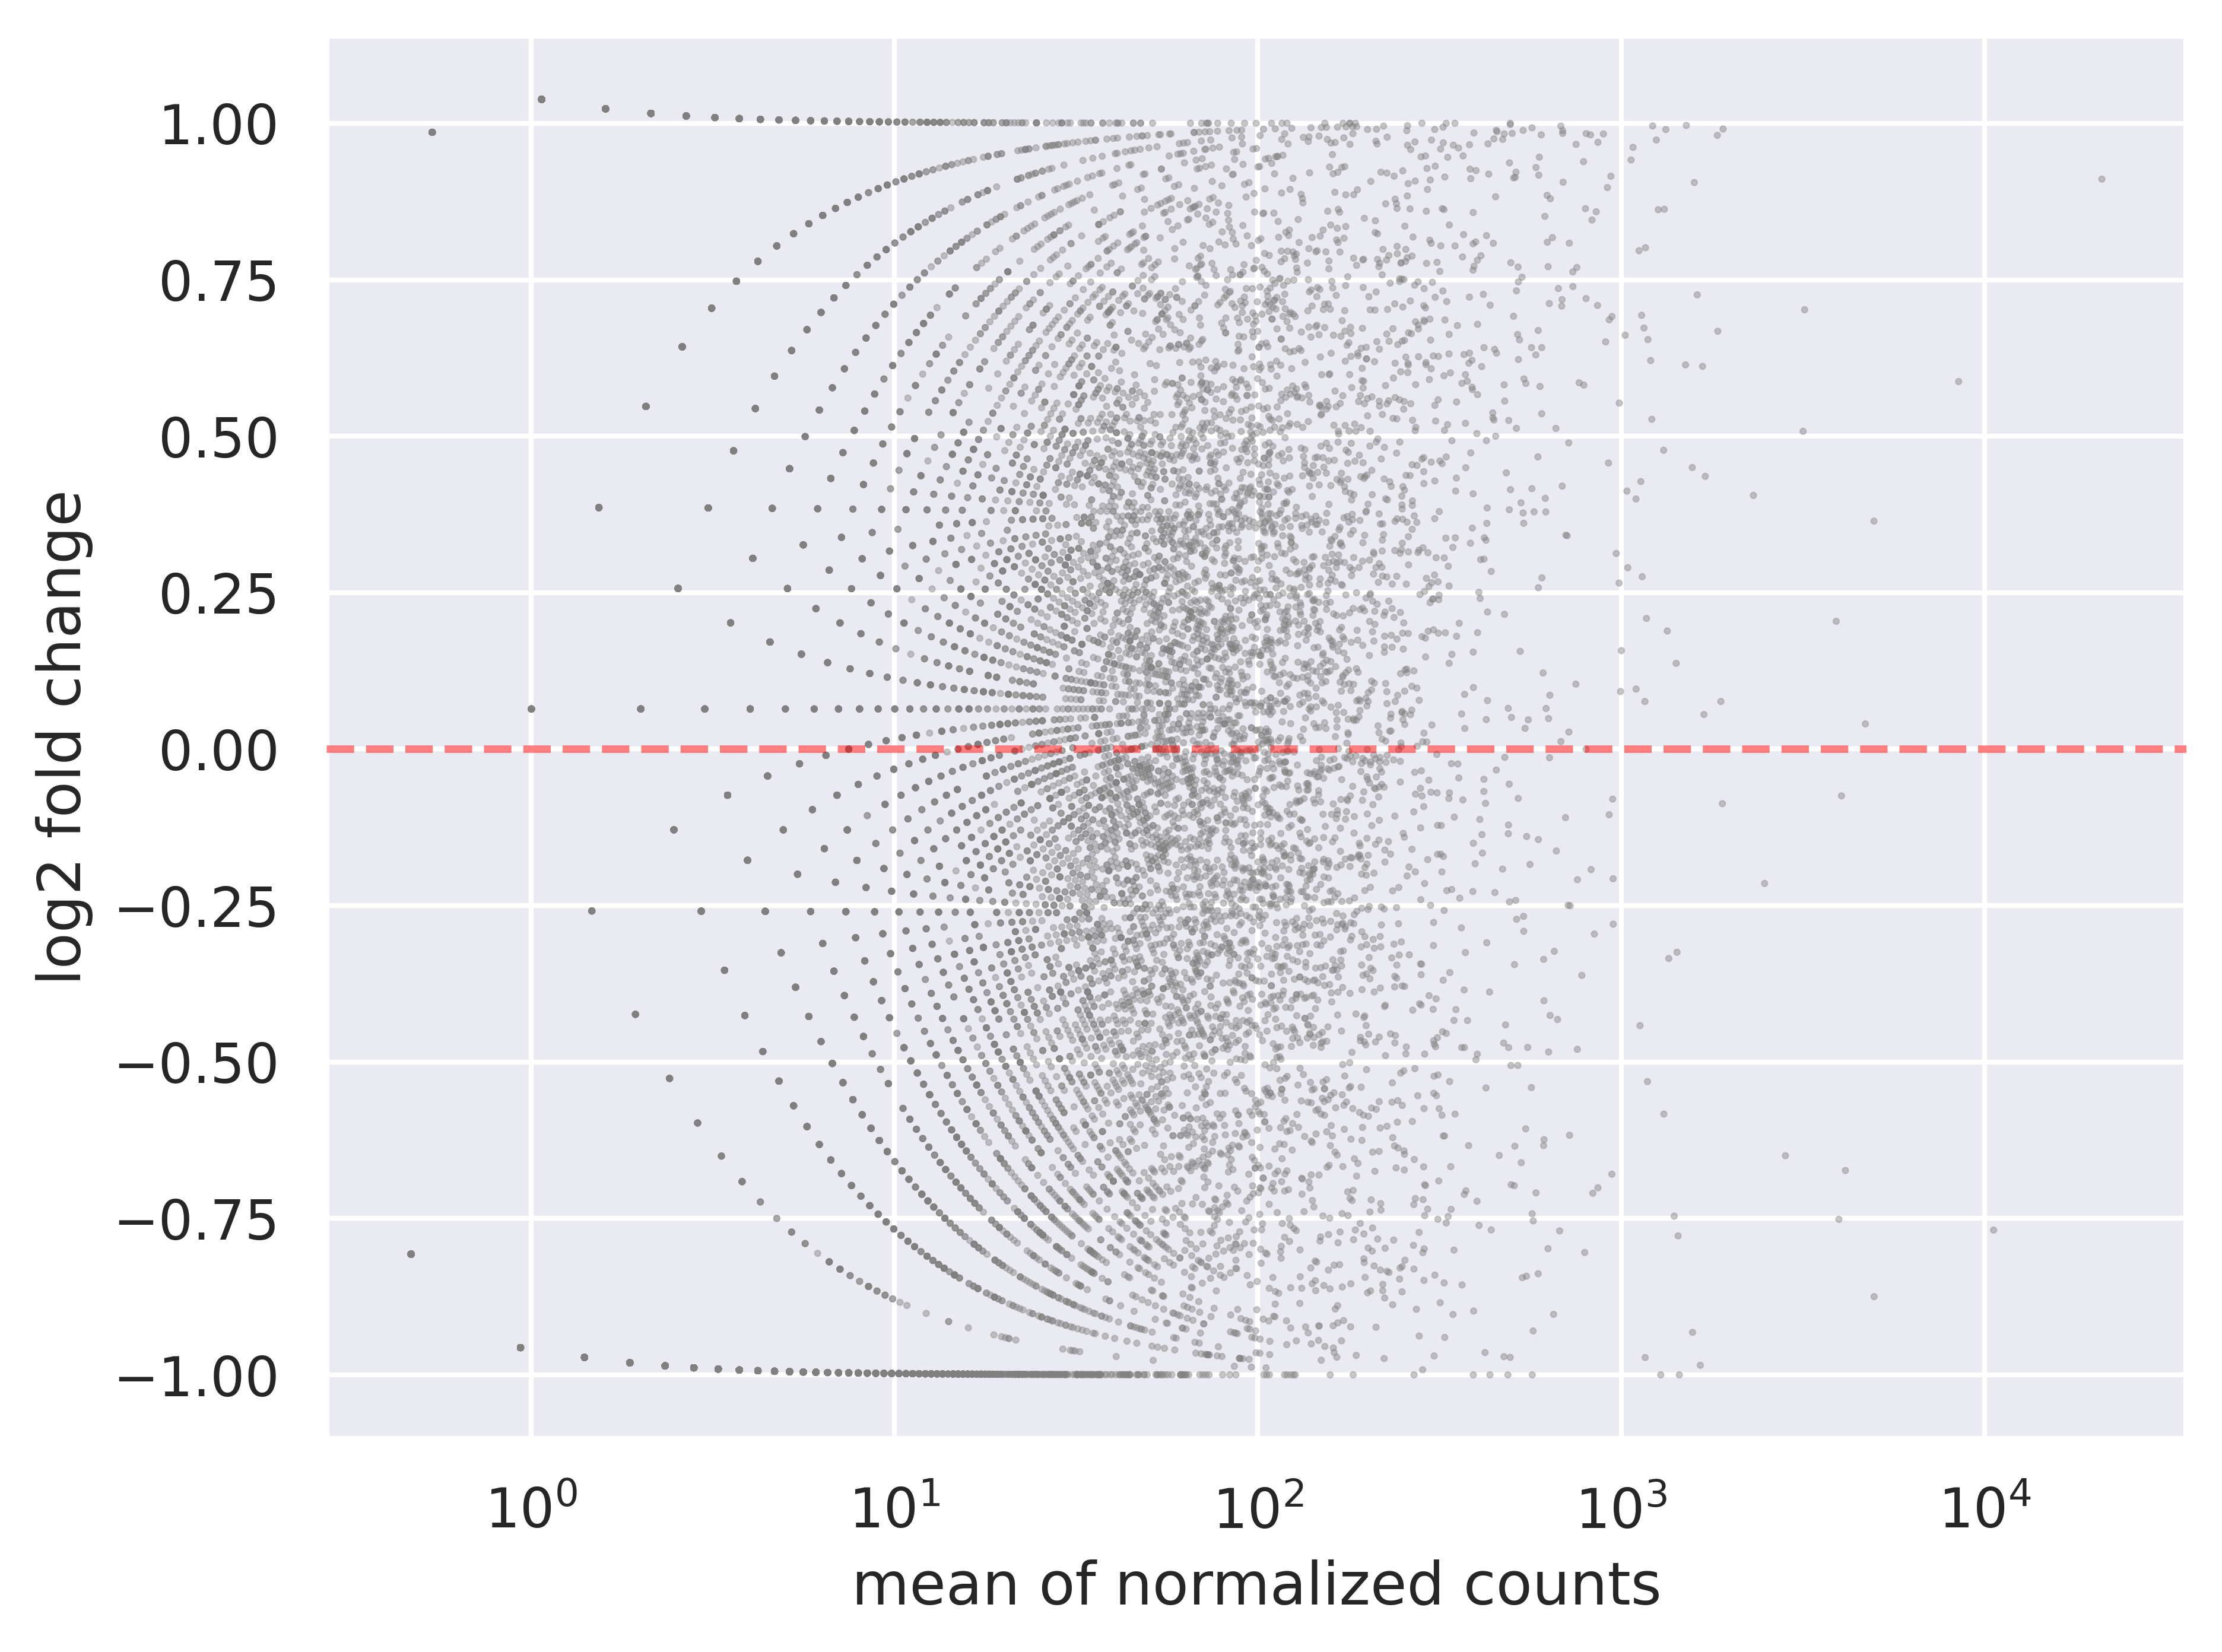

In [55]:
stats.plot_MA()

In [74]:
stats.prior_LFC_var

In [75]:
stats.quiet

False

In [77]:
results = stats.results_df

In [79]:
stats.statistics

,0
Spag11a,0.459916
Fgd6,-0.623115
Kcna7,-0.423688
Atp6v0d2,-0.443791
Nudt9,0.284822
...,...
Olfr364-ps1,NaN
Rab11fip2,0.587566
Apol10a,-0.443791
Ctnna1,-0.414902


In [81]:
stats.summary()

Log2 fold change & Wald test p-value: condition mTEC-IV vs bulk
               baseMean  log2FoldChange     lfcSE      stat    pvalue  \
Spag11a        1.603567        1.023251  2.224867  0.459916  0.645577   
Fgd6          62.605946       -0.522955  0.839260 -0.623115  0.533209   
Kcna7          2.338536       -0.985472  2.325940 -0.423688  0.671794   
Atp6v0d2       1.870829       -0.980532  2.209444 -0.443791  0.657194   
Nudt9         24.120327        0.104327  0.366287  0.284822  0.775780   
...                 ...             ...       ...       ...       ...   
Olfr364-ps1    0.000000             NaN       NaN       NaN       NaN   
Rab11fip2     34.276254        0.361595  0.615412  0.587566  0.556824   
Apol10a        1.870829       -0.980532  2.209444 -0.443791  0.657194   
Ctnna1       366.615609       -0.081099  0.195466 -0.414902  0.678214   
Gucy2d         5.746117       -0.603151  1.025654 -0.588064  0.556489   

                 padj  
Spag11a      0.849157  
Fgd6       

In [46]:
print(stats.summary)

<bound method DeseqStats.summary of <pydeseq2.ds.DeseqStats object at 0x7a54641cabf0>>


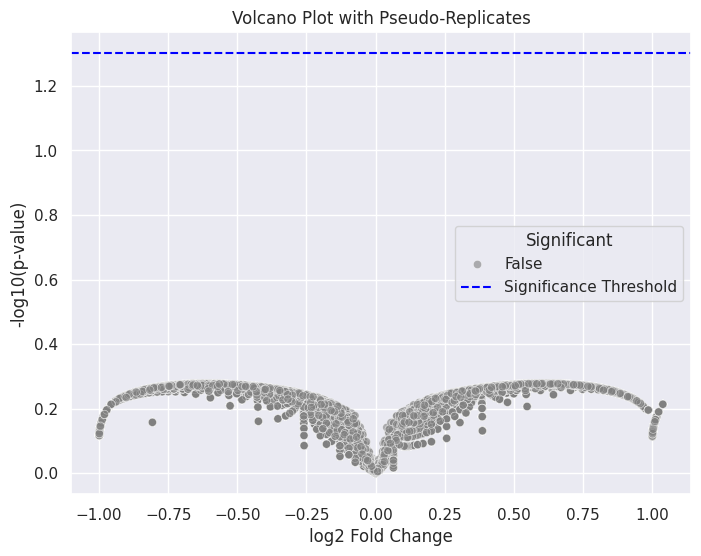

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=results["log2FoldChange"],
    y=-np.log10(results["pvalue"]),
    hue=results["padj"] < 0.05,
    palette={True: "red", False: "grey"},
    alpha=0.6
)
plt.axhline(-np.log10(0.05), color="blue", linestyle="--", label="Significance Threshold")
plt.xlabel("log2 Fold Change")
plt.ylabel("-log10(p-value)")
plt.title("Volcano Plot with Pseudo-Replicates")
plt.legend(title="Significant")
plt.show()
